In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Dataset Description

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



# Descriptive Statistics and Visualizations

In [26]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


For the "Median value of owner-occupied homes" provide a boxplot

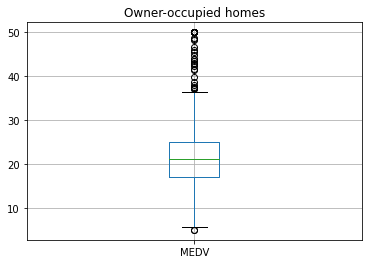

In [9]:
ax = boston_df.boxplot(column='MEDV')
ax.set_title('Owner-occupied homes')
plt.show()

* The median value for Owner-occupied homes is around $21000.

Provide a  bar plot for the Charles river variable

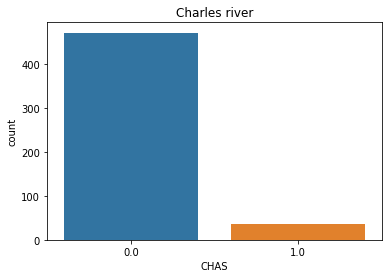

In [13]:
ax = sns.countplot(x='CHAS', data=boston_df)
ax.set_title('Charles river')
plt.show()

* Not many houses are near the Charles river.

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [14]:
# Discretizing the age group into 3 categories
boston_df.loc[(boston_df['AGE']<=35),'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70),'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>=70),'Age_Group'] = '70 years and older'

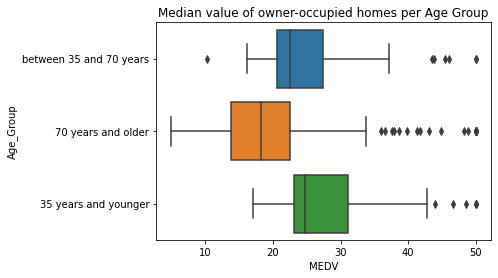

In [15]:
ax = sns.boxplot(x='MEDV',y='Age_Group',data=boston_df)
ax.set_title('Median value of owner-occupied homes per Age Group')
plt.show()

* The median value for MEDV is highest for the 35 years and younger group.

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

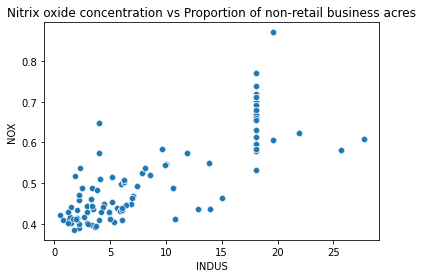

In [18]:
ax = sns.scatterplot(x='INDUS',y='NOX', data=boston_df)
ax.set_title('Nitrix oxide concentration vs Proportion of non-retail business acres')
plt.show()

* The bottom left section tells that for smaller proportion of non-retail business acres per town, NO concentration is strongly and positively related to it.
* Also higher proportions of non-retail business acres per town produces higher amount of NO concentrations.  

Create a histogram for the pupil to teacher ratio variable

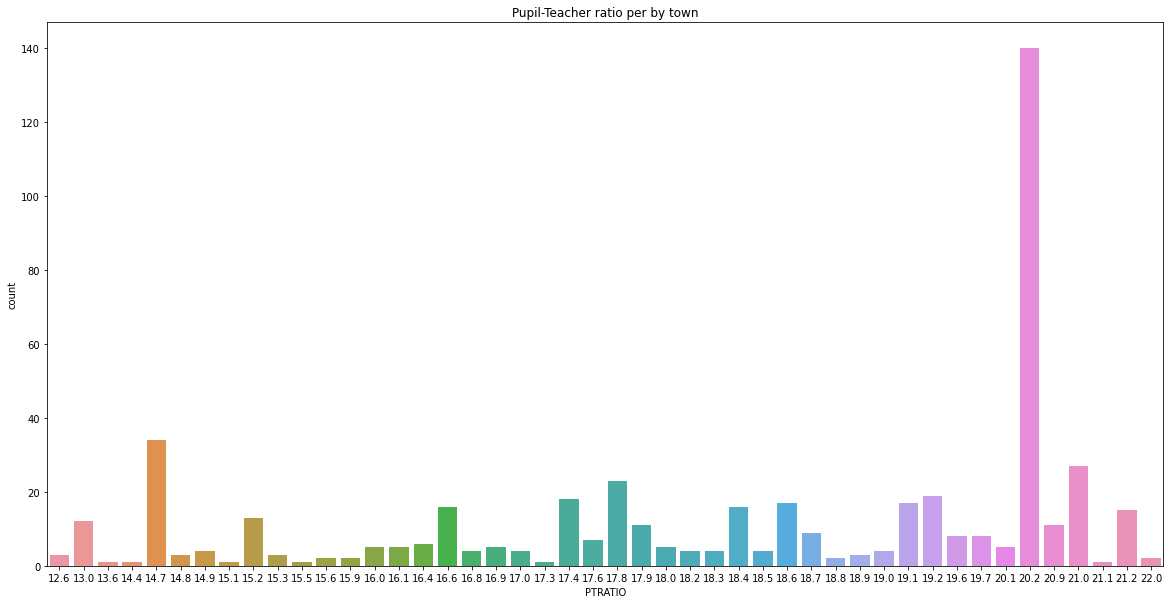

In [25]:
fig = plt.figure(figsize=(20,10))
ax = sns.countplot(x='PTRATIO', data=boston_df)
ax.set_title('Pupil-Teacher ratio per by town')
plt.show()

* The mode value for the PT ration by town is 20.2 for 140 houses out of 506. 

# Statistical tests

**Q.1->Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

State the hypothesis

*   $H\_0: m_1 = m_2$ ("there is no difference in the median values of houses bounded by Charles river and not bounded by Charles river.")
*   $H\_1: m_1 ≠ m_2$ ("there is a difference in the median values of houses bounded by Charles river and not bounded by Charles river")

Levene test to check for variance equality

In [31]:
scipy.stats.levene(boston_df[boston_df['CHAS']==1]['MEDV'],
                   boston_df[boston_df['CHAS']==0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

* Since p-value is less than 0.05, we reject the null hypothesis that the variances are equal for two groups.

In [29]:
# t-test 

scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],
                     boston_df[boston_df['CHAS']==0]['MEDV'],equal_var=False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

* Since the p-value is less the 0.05, we reject the null hypothesis as there is sufficient evidence that there is a difference in the median values of MEDV for both bounded and not bounded houses by Charles river.

**Q.2->Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**


State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three median values based on age group are equal)
*   $H\_1:$ At least one of the medians differ


In [34]:
scipy.stats.f_oneway(boston_df[boston_df['Age_Group']=='35 years and younger']['MEDV'],
                    boston_df[boston_df['Age_Group']=='between 35 and 70 years']['MEDV'],
                    boston_df[boston_df['Age_Group']=='70 years and older']['MEDV'])

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

* Since the p-value is less than 0.05, we reject the null hypothesis as there is enough statistical evidence that there is atleast one median value of MEDV different from the other medians.

**Q.3->Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**


Hypothesis

* $H\_0$: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
* $H\_1:$ There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [35]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

* Since p-value<0.05, we reject the null hypothesis and conclude that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

**Q.4->What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

In [36]:
# independent variable
x = boston_df['DIS']
# adding the constant or intercept to model
x = sm.add_constant(x)
# dependent variable
y = boston_df['MEDV']

ols = sm.OLS(y,x).fit()

print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           1.21e-08
Time:                        11:21:36   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


* The p-value<0.05, so there is evidence of correlation between DIS and the median values of owner-occupied houses.
* The pearson correlation coefficient is 0.25 i.e (sqrt.root of r_squared).
* The coef = 1.0916 i.e the MEDV increases 1.0916 times the DIS.